## 한글 깨짐 방지 코드

In [ ]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,585 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126101 files and dire

## Import data

In [ ]:
import pandas as pd
import nltk
from nltk import sent_tokenize, word_tokenize, pos_tag
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
# Download the required resource for pos_tag
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
# 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/ESAA OB 2조/프로젝트 2/data/train.csv')

In [ ]:
df.head()

,index,text,author
0,0,"He was almost choking. There was so much, so m...",3
1,1,"“Your sister asked for it, I suppose?”",2
2,2,"She was engaged one day as she walked, in per...",1
3,3,"The captain was in the porch, keeping himself ...",4
4,4,"“Have mercy, gentlemen!” odin flung up his han...",3


##05 품사별 분포 - 한재희

## 1. 작가별 품사 분포 차이

### 작가별 품사 분포 상위 10개

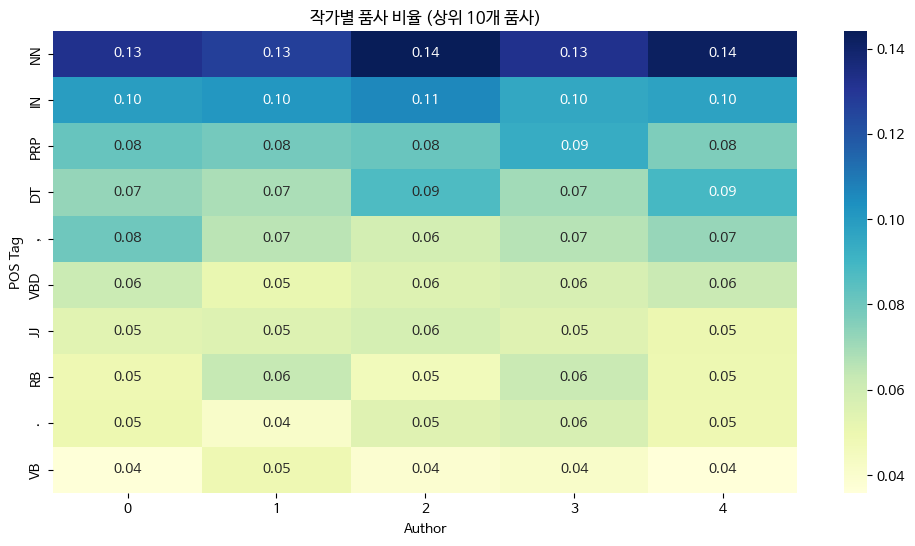

In [ ]:
# POS 리스트 생성
df['pos'] = df['text'].apply(lambda x: [tag for _, tag in pos_tag(word_tokenize(str(x)))])

# 작가별 품사 카운트
author_pos = df.groupby('author')['pos'].sum().apply(Counter)

# 비율 정규화
author_pos_ratio = {
    author: {tag: count / sum(pos_counts.values())
             for tag, count in pos_counts.items()}
    for author, pos_counts in author_pos.items()
}

# DataFrame 변환
import pandas as pd
pos_df = pd.DataFrame(author_pos_ratio).fillna(0)

# 상위 품사만 보기
top_tags = pos_df.sum(axis=1).sort_values(ascending=False).head(10).index
pos_df_top = pos_df.loc[top_tags]

# 히트맵 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(pos_df_top, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('작가별 품사 비율 (상위 10개 품사)')
plt.ylabel('POS Tag')
plt.xlabel('Author')
plt.show()

상위 10개

1. NN (단수 명사)
2. IN (전치사/종속접속사)
3. PRP (인칭대명사)
4. DT (관사)
5. ,
6. VBD (동사 과거형)
7. JJ (일반 형용사)
8. RB (일반 부사)
9. .
10. VB (동사 원형)



❓ 5, 9번 문장 부호인데 이거 전처리? 할건가욤? 만약 전처리 진행하면 다른 품사 두개가 추가되어서 업데이트 될 듯


❓ 근데 , 같은 경우에는 많이 쓰면 '문장 길이가 길다' 같이 작가 특징을 확인할 수 있을 것 같아서 삭제하는게 맞는지 궁금해여

### 작가별 품사 분포 작가별로 상위 10개 따로

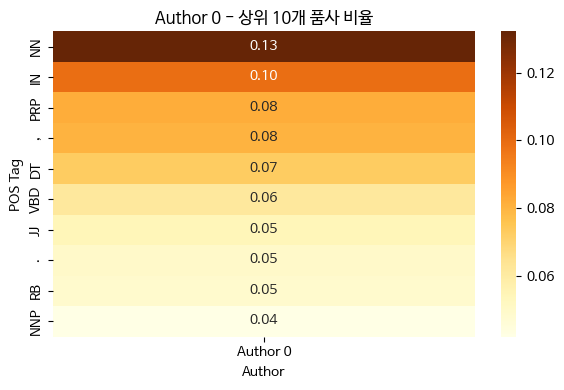

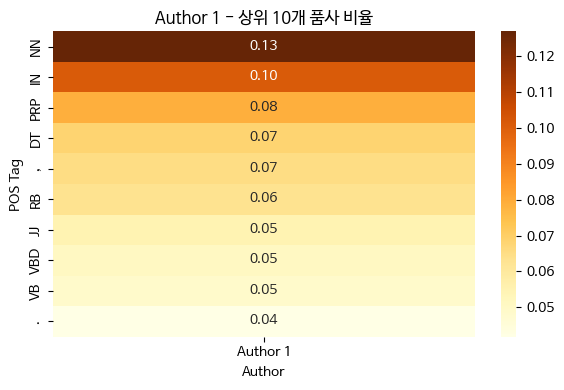

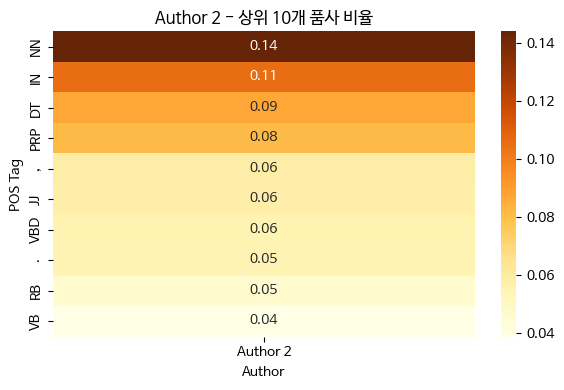

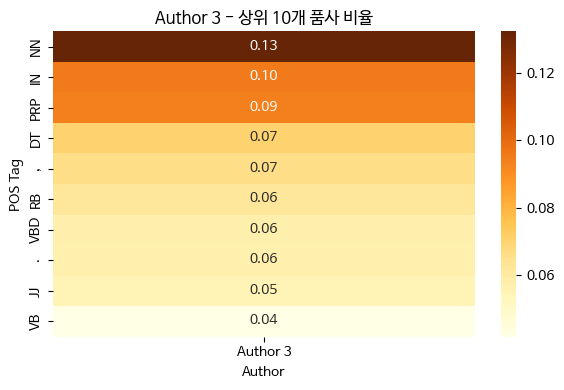

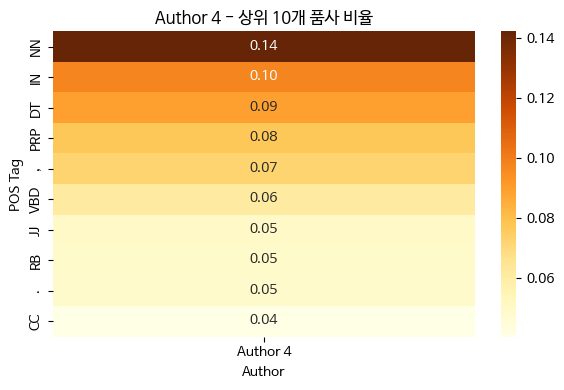

In [ ]:
# POS 리스트 생성
df['pos'] = df['text'].apply(lambda x: [tag for _, tag in pos_tag(word_tokenize(str(x)))])
author_pos = df.groupby('author')['pos'].sum().apply(Counter)

# 비율 정규화
author_pos_ratio = {
    author: {tag: count / sum(pos_counts.values())
             for tag, count in pos_counts.items()}
    for author, pos_counts in author_pos.items()
}

# 작가별 상위 10개 품사 추출 및 시각화
for author, pos_ratio in author_pos_ratio.items():
    # 정렬된 상위 10개 품사
    top_tags = dict(sorted(pos_ratio.items(), key=lambda x: x[1], reverse=True)[:10])

    # DataFrame 생성
    temp_df = pd.DataFrame.from_dict(top_tags, orient='index', columns=[f'Author {author}'])

    # 시각화
    plt.figure(figsize=(6, 4))
    sns.heatmap(temp_df, annot=True, cmap='YlOrBr', fmt='.2f')
    plt.title(f'Author {author} - 상위 10개 품사 비율')
    plt.ylabel('POS Tag')
    plt.xlabel('Author')
    plt.tight_layout()
    plt.show()

상위 10개 했을때 작가별로 크게 차이가 안나는거 같아서 작가마다 상위 10개를 따로 출력하는 코드를 해봤는데 GPT 물어보니까 해석 어려움, 모델 복잡도 때문에 썩 추천하지 않는다는 느낌으로 알려줌

### 품사 카테고리 변환 후 작가별 사용 분포 확인

In [ ]:
# 품사 그룹 정의
pos_category_map = {
    'NN': 'Noun', 'NNS': 'Noun', 'NNP': 'Noun', 'NNPS': 'Noun',
    'VB': 'Verb', 'VBD': 'Verb', 'VBG': 'Verb', 'VBN': 'Verb', 'VBP': 'Verb', 'VBZ': 'Verb',
    'JJ': 'Adjective', 'JJR': 'Adjective', 'JJS': 'Adjective',
    'RB': 'Adverb', 'RBR': 'Adverb', 'RBS': 'Adverb',
    'PRP': 'Pronoun', 'PRP$': 'Pronoun', 'WP': 'Pronoun', 'WP$': 'Pronoun',
    'IN': 'Preposition/Conjunction', 'CC': 'Preposition/Conjunction', 'DT': 'Preposition/Conjunction',
    'TO': 'Preposition/Conjunction', 'MD': 'Preposition/Conjunction', 'RP': 'Preposition/Conjunction',
    '.': 'Punctuation', ',': 'Punctuation', ':': 'Punctuation', ';': 'Punctuation',
    '!': 'Punctuation', '?': 'Punctuation', '``': 'Punctuation', "''": 'Punctuation'
}

In [ ]:
from nltk import word_tokenize, pos_tag
from collections import Counter
import pandas as pd

# 텍스트를 품사 카테고리로 변환
def get_pos_categories(text):
    tokens = word_tokenize(str(text))
    tags = pos_tag(tokens)
    categories = [pos_category_map.get(tag, 'Other') for word, tag in tags]
    return categories

# 적용하여 각 작가의 카테고리별 품사 추출
df['pos_cat'] = df['text'].apply(get_pos_categories)

In [ ]:
# 작가별 품사 카테고리 합산
author_pos_cat = df.groupby('author')['pos_cat'].sum().apply(Counter)

# 비율로 정규화
author_cat_ratio = {
    author: {cat: count / sum(cat_counts.values())
             for cat, count in cat_counts.items()}
    for author, cat_counts in author_pos_cat.items()
}

# DataFrame 변환
cat_df = pd.DataFrame(author_cat_ratio).fillna(0)

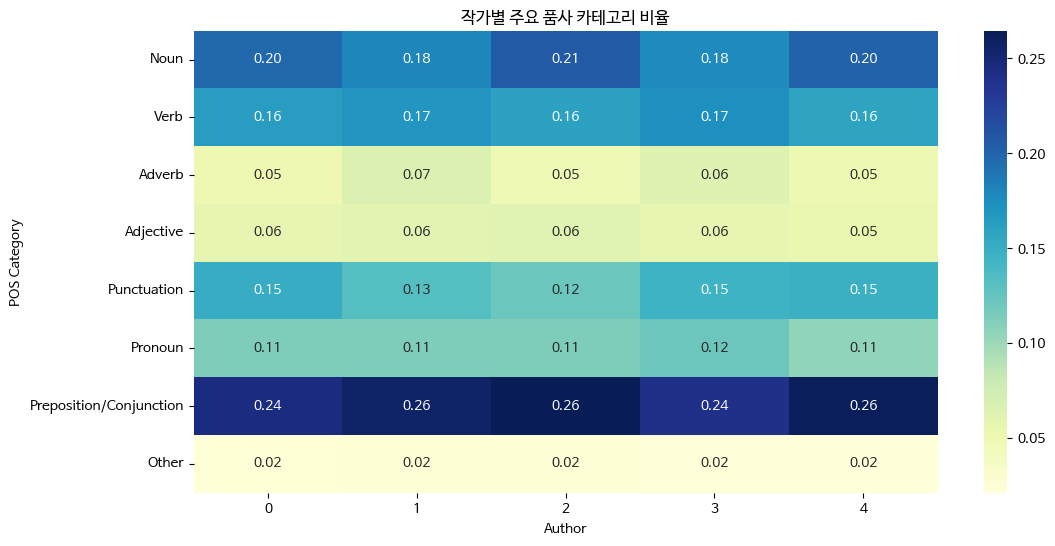

In [ ]:
# 히트맵 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(cat_df, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('작가별 주요 품사 카테고리 비율')
plt.ylabel('POS Category')
plt.xlabel('Author')
plt.show()

이것도 혹시나 해서 해봤는데 동사 같이 과거동사, 현재진행형 동사 등 각각이 갖는 의미를 한번에 동사로 퉁치는거여서 그렇게 좋은거 같지는 않아욤....

##  2. 문장 구조 복잡성 지표 (IN, CC, DT, , 등)

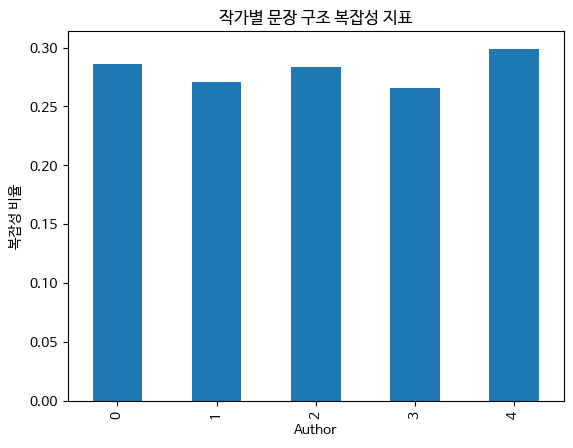

In [ ]:
complex_tags = ['IN', 'CC', 'DT', ',']  # 수식/접속 관련 품사
complexity_ratio = {
    author: sum(pos_counts.get(tag, 0) for tag in complex_tags) / sum(pos_counts.values())
    for author, pos_counts in author_pos.items()
}

pd.Series(complexity_ratio).plot(kind='bar', title='작가별 문장 구조 복잡성 지표')
plt.ylabel('복잡성 비율')
plt.xlabel('Author')
plt.show()

## 3. POS Tag n-gram (2-gram) 조합 빈도

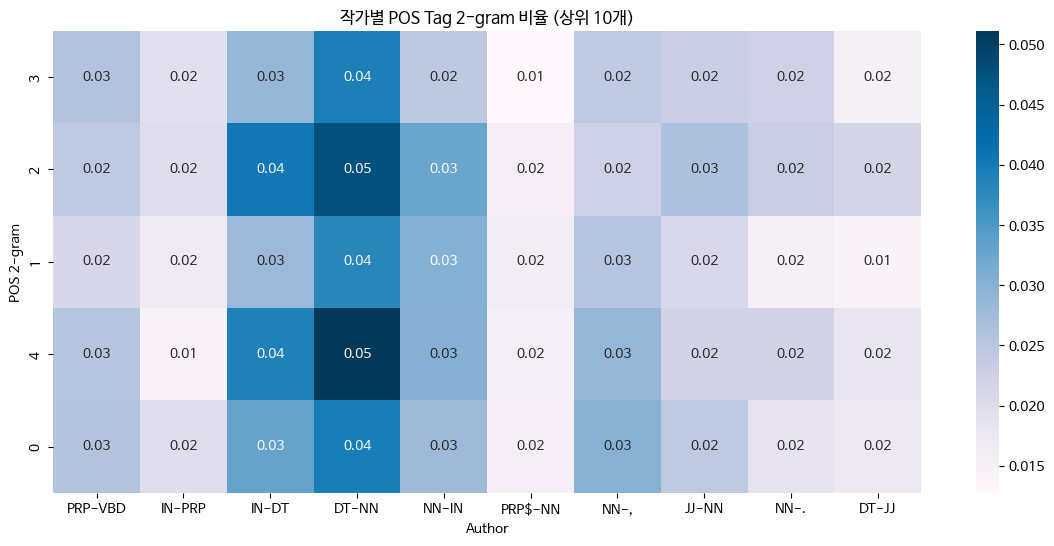

In [ ]:
from nltk.util import ngrams
from collections import defaultdict

author_bigram = defaultdict(Counter)

for i, row in df.iterrows():
    author = row['author']
    pos_tags = row['pos']
    bigrams = ngrams(pos_tags, 2)
    author_bigram[author].update(bigrams)

# 상위 bigram 추출
top_bigrams = Counter()
for bigrams in author_bigram.values():
    top_bigrams.update(bigrams)
top_10_bigrams = dict(top_bigrams.most_common(10))

# 작가별 상위 bigram 비율
bigram_ratio_df = pd.DataFrame({
    author: {bg: count / sum(counter.values()) for bg, count in counter.items() if bg in top_10_bigrams}
    for author, counter in author_bigram.items()
}).fillna(0)

# 시각화
plt.figure(figsize=(14, 6))
sns.heatmap(bigram_ratio_df.T, annot=True, fmt='.2f', cmap='PuBu')
plt.title('작가별 POS Tag 2-gram 비율 (상위 10개)')
plt.ylabel('POS 2-gram')
plt.xlabel('Author')
plt.show()

- PRP - VBD : 인칭대명사 + 과거동사 / “he went”

- IN - PRP : 전치사 + 인칭대명사 / “to him”

- IN - DT : 전치사 + 관사 / “for a”

- DT - NN : 관사 + 명사 / “a man”

- NN - IN : 명사 + 전치사 / "house on"

- PRP$ - NN : 소유대명사 + 명사 / "his car"

- NN - , : 명사 + 쉼표 / "John, who.."

- JJ - NN : 형용사 + 명사 / "blue sky"

- NN - . : 명사 + 마침표 / "dog."

- DT - JJ : 관사 + 형용사 / "a big"

## 지피티 도움을 받은 그래프를 통해 알 수 있는 작가별 특징

🔹 Author 0

•	품사 비율: 일반 명사(NN), 전치사(IN), 인칭대명사(PRP) 비율이 높음.

•	POS 2-gram: DT→NN, IN→DT, PRP→VBD와 같은 구문 구조가 많이 나타남. 문장이 주어+동사 구조를 자주 따름.

•	문장 구조 복잡성: 약 0.29, 다섯 작가 중 두 번째로 높은 수준.

•	종합 특징: 문법적으로 안정된 구조 사용. 명사구 중심, 주어 중심의 문장 구성.

🔹 Author 1

•	품사 비율: DT(관사)와 RB(부사)의 비율이 비교적 높은 편. JJ(형용사), VB(동사)도 고르게 사용됨.

•	POS 2-gram: IN→PRP, IN→DT, DT→NN 조합이 많아 전치사구 사용이 두드러짐.

•	문장 구조 복잡성: 약 0.27로 중하위권.

•	종합 특징: 부사와 관사를 활용해 수식이 많은 문장을 구성. 구조는 단순한 편이나 수식어 사용 빈도가 높음.

🔹 Author 2

•	품사 비율: NN 비율 가장 높음 (0.14), DT도 높아 명사구 중심 문장 두드러짐.

•	POS 2-gram: DT→NN, IN→DT 등 전형적인 명사구 구조 + PRP$→NN(소유격 + 명사) 높은 사용.

•	문장 구조 복잡성: 약 0.28, 평균 수준.

•	종합 특징: 명사구 활용이 가장 활발하며, 소유 구조도 자주 사용. 문법 구조는 비교적 전형적이고 명확함.

🔹 Author 3

•	품사 비율: PRP, DT, JJ의 사용이 고르게 분포됨.

•	POS 2-gram: NN→IN, NN→,(쉼표), JJ→NN 빈도 높아 수식어 + 삽입구문이 많은 문장 구사.

•	문장 구조 복잡성: 0.265, 다섯 작가 중 가장 낮은 수준.

•	종합 특징: 수식은 풍부하지만 문장 자체는 단순한 구조. 삽입이나 쉼표 사용이 많음.

🔹 Author 4

•	품사 비율: NN, DT, JJ 비율 높고 PRP 상대적으로 낮음.

•	POS 2-gram: NN→IN, JJ→NN, DT→JJ 자주 등장 → 형용사 중심 수식 + 명사구 구조 풍부.

•	문장 구조 복잡성: 0.30, 다섯 명 중 가장 높음.

•	종합 특징: 복잡한 문장 구조, 형용사/전치사구 활용 많음. 문체가 가장 문법적으로 복잡하며 세련됨.

## 모델링 코드

In [ ]:
import pandas as pd
import nltk
from collections import Counter
from nltk import pos_tag, word_tokenize, bigrams
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# NLTK 리소스 다운로드
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


def extract_features(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    pos_tags = [tag for word, tag in tagged]

    # 1. POS 태그 비율
    pos_counts = Counter(pos_tags)
    total = sum(pos_counts.values())
    pos_ratio = {f'pos_{k}': v / total for k, v in pos_counts.items()}

    # 2. POS 2-gram 비율
    pos_bigrams = list(bigrams(pos_tags))
    bigram_counts = Counter(pos_bigrams)
    total_bigrams = sum(bigram_counts.values())
    pos_bigram = {
        f'bigram_{"-".join(k)}': v / total_bigrams for k, v in bigram_counts.items()
    }

    # 3. 복잡성 지표 (IN, DT, CC, ,)
    complex_tags = ['IN', 'DT', 'CC', ',']
    complex_count = sum(pos_counts[tag] for tag in complex_tags if tag in pos_counts)
    complexity_ratio = {'complex_ratio': complex_count / total if total > 0 else 0}

    # 모든 feature 결합
    features = {}
    features.update(pos_ratio)
    features.update(pos_bigram)
    features.update(complexity_ratio)
    return features

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# 특징 추출
feature_list = [extract_features(text) for text in df['text']]
feature_df = pd.DataFrame(feature_list).fillna(0)

# 정규화
scaler = StandardScaler()
X = scaler.fit_transform(feature_df)

# 레이블
y = df['author']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 예측 및 평가
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.60      0.56      2678
           1       0.61      0.30      0.41      1422
           2       0.52      0.54      0.53      2307
           3       0.51      0.72      0.60      2995
           4       0.59      0.23      0.33      1574

    accuracy                           0.53     10976
   macro avg       0.55      0.48      0.48     10976
weighted avg       0.54      0.53      0.51     10976



In [ ]:
from sklearn.metrics import log_loss

# 예측 확률 계산
y_proba = clf.predict_proba(X_test)

# log loss 계산
print("Log Loss:", log_loss(y_test, y_proba))

Log Loss: 1.2594379294554285
